In [1]:
!pip install category_encoders==2.*

     |████████████████████████████████| 80 kB 2.0 MB/s 


In [2]:
 !pip install pandas_profiling==2.*

     |████████████████████████████████| 245 kB 4.2 MB/s 
     |████████████████████████████████| 62 kB 732 kB/s 
     |████████████████████████████████| 675 kB 45.0 MB/s 
     |████████████████████████████████| 102 kB 53.7 MB/s 
     |████████████████████████████████| 3.1 MB 35.2 MB/s 
     |████████████████████████████████| 812 kB 66.5 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cd8e57f0f94c666df7f4f260af51d49b11eb14e157d88e12153fdcab715e7008
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=535f1699aad83a6c820948a3e64278c8b089acbf9599e827ce8ce459ea80daa9
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
   

In [3]:
from pandas_profiling import ProfileReport

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# encoders
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

#pipeline
from sklearn.pipeline import make_pipeline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def wrangle(filepath):
  df = pd.read_csv(filepath)

  #create total alc comsumption
  df['Talc'] = df['Dalc'] + df['Walc']

  # Drop high-cardinality categorical variables
  categorical_cols = df.select_dtypes('object').columns
  
  threshold = 10
  high_card_cols = [col for col in categorical_cols 
                    if df[col].nunique() > threshold]
  df.drop(high_card_cols, axis=1, inplace=True)

  #combine grade columns 
  df['grad_tot'] = df['G1'] + df['G2'] + df['G3']

  df.drop(columns = ['G1', 'G2', 'G3'], inplace=True)

  #split Talc into 3 categories
  consum_lvl = []

  for i in df['Talc']:
    if i <= 4:
      consum_lvl.append(1)
    elif i <= 7:
      consum_lvl.append(2)
    else:
      consum_lvl.append(3)

  df['consum_lvl'] = consum_lvl

  df.drop(columns = ['Talc', 'Dalc', 'Walc'], inplace=True)

  return df

In [6]:
math_stud = pd.read_csv('student-mat.csv')
por_stud = pd.read_csv('student-por.csv')

In [7]:
math_stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
por_stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [9]:
df_stud = wrangle('student-por.csv')

In [10]:
df_stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,grad_tot,consum_lvl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,4,22,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,2,31,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,3,6,37,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,5,0,42,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,5,0,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,5,4,31,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,4,46,1
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,5,6,32,1
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,2,6,30,2


In [11]:
df_stud['consum_lvl'].value_counts()

1    456
2    155
3     38
Name: consum_lvl, dtype: int64

In [12]:
report = ProfileReport(df_stud, minimal= True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
target = 'consum_lvl'
X = df_stud.drop(columns=target)
y = df_stud[target]

In [14]:
y.shape

(649,)

In [15]:
df_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state = 7)

In [17]:
y_train.shape

(519,)

In [56]:
model_rf = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         RandomForestClassifier(n_jobs=-1, random_state= 7, n_estimators=75))

model_rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['school', 'sex', 'address', 'famsize',
                                      'Pstatus', 'Mjob', 'Fjob', 'reason',
                                      'guardian', 'schoolsup', 'famsup', 'paid',
                                      'activities', 'nursery', 'higher',
                                      'internet', 'romantic'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'school',
                                          'data_type': dtype('O'),
                                          'mappi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                     

In [57]:
model_rf.score(X_train, y_train)

1.0

In [58]:
model_rf.score(X_val, y_val)

0.7384615384615385

In [21]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.6994219653179191


In [22]:
model_xgb = make_pipeline(OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         XGBClassifier(random_state = 42, n_estimators=75, n_jobs = -1, learning_rate = 0.2)) #Try different learning rates (0.01,0.1,0.2,0.4,0.6)
model_xgb.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['school', 'sex', 'address', 'famsize',
                                      'Pstatus', 'Mjob', 'Fjob', 'reason',
                                      'guardian', 'schoolsup', 'famsup', 'paid',
                                      'activities', 'nursery', 'higher',
                                      'internet', 'romantic'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'school',
                                          'data_type': dtype('O'),
                                          'mappi...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.2,
                               max_delta_step=

In [23]:
model_xgb.score(X_train, y_train)

0.9421965317919075

In [24]:
model_xgb.score(X_val, y_val)

0.6846153846153846

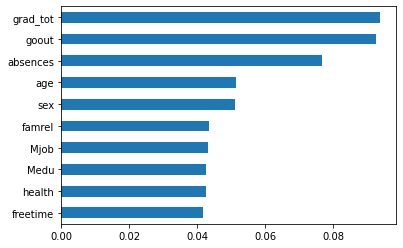

In [25]:
importances =  model_rf.named_steps['randomforestclassifier'].feature_importances_
feature_names = X_train.columns
feat_imp =pd.Series(data=importances,index=feature_names).sort_values()
feat_imp.tail(10).plot(kind='barh')

In [26]:
from sklearn.inspection import permutation_importance
perm_imp = permutation_importance(model_rf, X_val,y_val,random_state=42)

data_perm = {'imp_mean':perm_imp['importances_mean'],
             'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values('imp_mean')

df_perm

,imp_mean,imp_std
guardian,-6.153846e-03,0.005756
internet,-4.615385e-03,0.003768
address,-4.615385e-03,0.003768
activities,-4.615385e-03,0.003768
Pstatus,-4.615385e-03,0.003768
traveltime,-4.615385e-03,0.007845
failures,-1.538462e-03,0.003077
schoolsup,0.000000e+00,0.000000
nursery,2.220446e-17,0.004865
Fedu,4.440892e-17,0.006880


In [27]:
!pip install pdpbox
!pip install shap
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap
pd.options.display.max_rows = 200

     |████████████████████████████████| 34.0 MB 41 kB/s 
     |████████████████████████████████| 13.1 MB 6.4 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=c6a8515b5b52b8f554f40257312d93537a6ade08ec5c323960785ee640c67cb7
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 2.13.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 356 kB 4.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491642 sha256=2ffd40464a457e6a7beba09b683054740162a681c08b4e79cc884b82d4d32ed6
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [28]:
df_stud['consum_lvl'].value_counts()

1    456
2    155
3     38
Name: consum_lvl, dtype: int64

In [29]:
df_low = df_stud[df_stud['consum_lvl'] == 1]
df_med = df_stud[df_stud['consum_lvl'] == 2]
df_high = df_stud[df_stud['consum_lvl'] == 3]

In [30]:
df_low_samp = df_low.sample(155,replace = False)
df_med_samp = df_med.sample(155,replace = False)
df_high_samp = df_high.sample(155,replace = True)

In [31]:
df_final_ = df_low_samp.append(df_med_samp, ignore_index=True)

In [32]:
df_final = df_final_.append(df_high_samp, ignore_index=True)

In [78]:
df_final.shape

(465, 30)

In [59]:
target = 'consum_lvl'
X_1 = df_final.drop(columns=target)
y_1 = df_final[target]

In [60]:
 X_1_train, X_1_val, y_1_train, y_1_val = train_test_split(X_1,y_1,test_size=.2, random_state = 7)

In [61]:
model_rf.fit(X_1_train,y_1_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['school', 'sex', 'address', 'famsize',
                                      'Pstatus', 'Mjob', 'Fjob', 'reason',
                                      'guardian', 'schoolsup', 'famsup', 'paid',
                                      'activities', 'nursery', 'higher',
                                      'internet', 'romantic'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'school',
                                          'data_type': dtype('O'),
                                          'mappi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                     

In [62]:
model_rf.score(X_1_val,y_1_val)

0.7419354838709677

In [63]:
model_rf.score(X_1_train,y_1_train)

1.0

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
param_grid = {'simpleimputer__strategy':['median','mean'], 
             'randomforestclassifier__max_depth':range(5,35,5), 
             'randomforestclassifier__n_estimators':range(25,100,25)}

In [77]:
model_rfrs = RandomizedSearchCV(model_rf, 
                               param_distributions = param_grid,
                               n_iter = 15,
                               cv = 5,
                               n_jobs = -1,
                               verbose = 1)
model_rfrs.fit(X_1,y_1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['school',
                                                                   'sex',
                                                                   'address',
                                                                   'famsize',
                                                                   'Pstatus',
                                                                   'Mjob',
                                                                   'Fjob',
                                                                   'reason',
                                                                   'guardian',
                                                                   'schoolsup',
                                                                   'fams

In [79]:
model_rfrs.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'median'}

In [82]:
model_rfrs.best_score_

0.7376344086021506

In [83]:
model_rfgs = GridSearchCV(model_rf,
                         param_grid = param_grid,
                         n_jobs=-1,
                         cv = 5,
                         verbose = 1)

model_rfgs.fit(X_1,y_1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   36.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['school', 'sex',
                                                             'address',
                                                             'famsize',
                                                             'Pstatus', 'Mjob',
                                                             'Fjob', 'reason',
                                                             'guardian',
                                                             'schoolsup',
                                                             'famsup', 'paid',
                                                             'activities',
                                                             'nursery',
                                                             'higher',
                                    

In [84]:
model_rfgs.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'median'}

In [85]:
model_rfgs.best_score_

0.7376344086021506

In [86]:
model_rf_1 = make_pipeline(OrdinalEncoder(),
                           SimpleImputer(strategy='median'),
                           RandomForestClassifier(n_jobs=-1, random_state= 7, n_estimators=50, max_depth=15))

model_rf_1.fit(X_1_train,y_1_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['school', 'sex', 'address', 'famsize',
                                      'Pstatus', 'Mjob', 'Fjob', 'reason',
                                      'guardian', 'schoolsup', 'famsup', 'paid',
                                      'activities', 'nursery', 'higher',
                                      'internet', 'romantic'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'school',
                                          'data_type': dtype('O'),
                                          'mappi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=15, max_features='auto',
                                       

In [87]:
model_rf_1.score(X_1_val,y_1_val)

0.6774193548387096

(<Figure size 1080x1080 with 4 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fe58bd1e810>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe4a27dc950>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


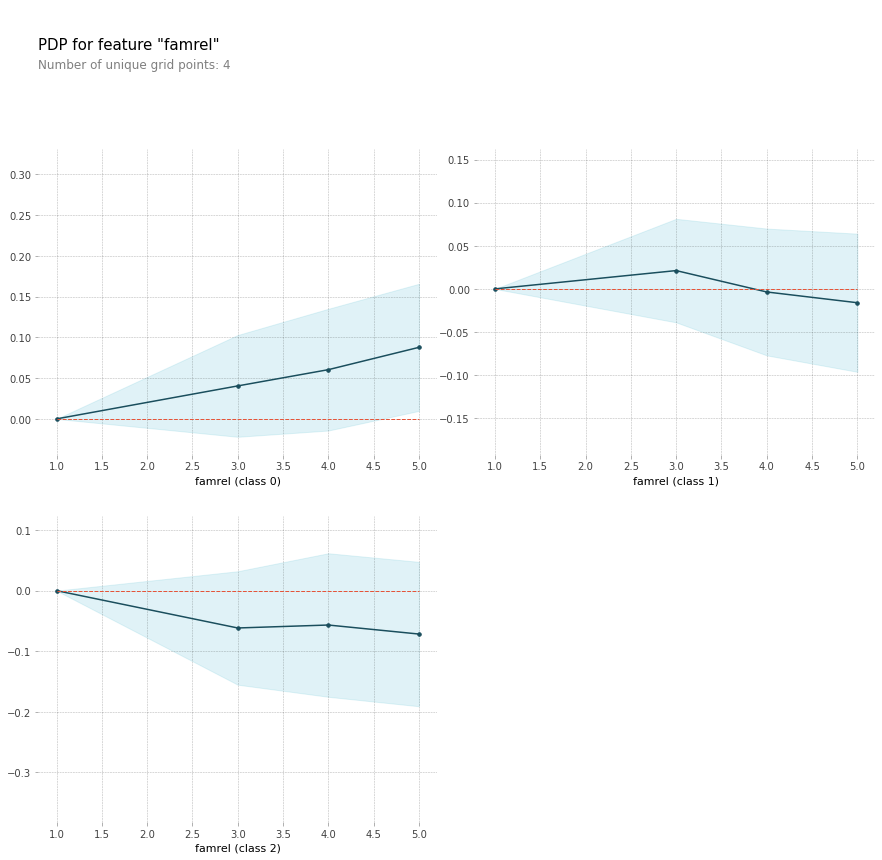

In [44]:
isolate = pdp_isolate(model_rf, dataset = X_1_val,
                      model_features = X_1_val.columns,
                      feature = 'famrel')

pdp_plot(isolate,feature_name='famrel')

(<Figure size 1080x1224 with 7 Axes>,
 {'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7fe58baaac10>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe58bb35b50>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


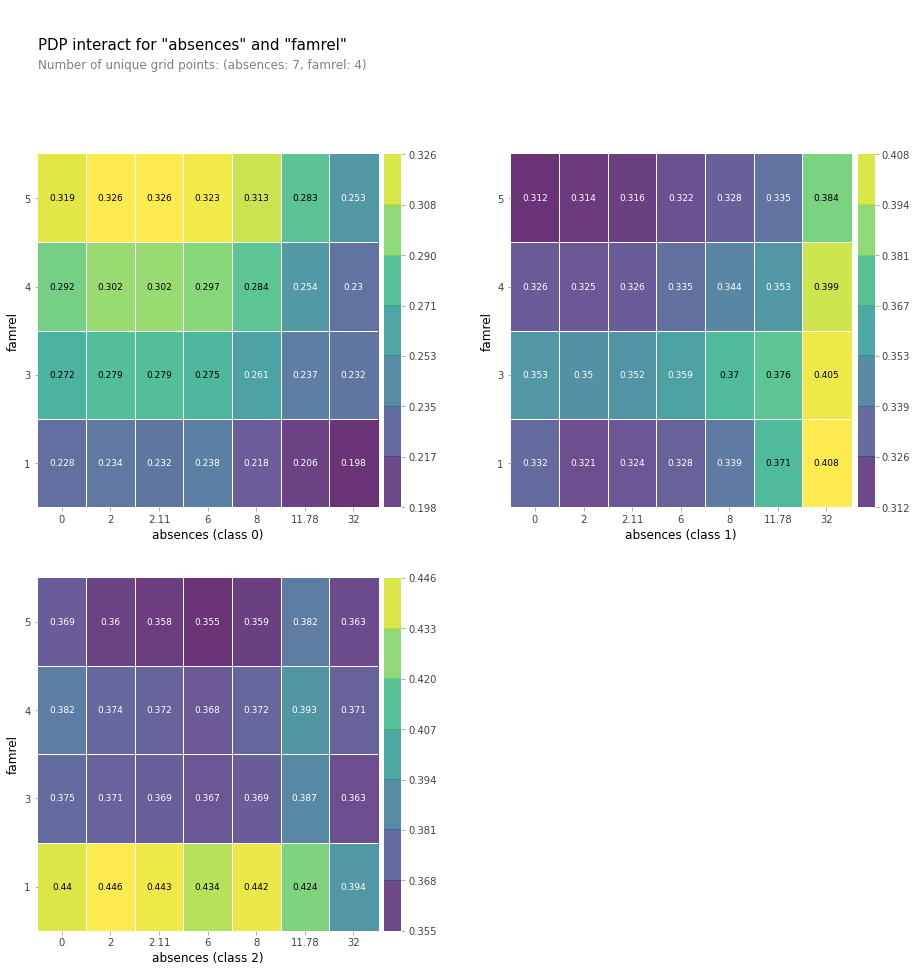

In [45]:
features = ['absences','famrel']
interact = pdp_interact(model_rf, dataset=X_1_val,
                        model_features = X_1_val.columns,
                        features = features)
pdp_interact_plot(interact,plot_type = 'grid',feature_names = features)

In [46]:
model_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),    
    SimpleImputer(strategy='mean'),       
    StandardScaler(),                     
    LogisticRegression()
)

model_logr.fit(X_1_train, y_1_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['school', 'sex', 'address', 'famsize',
                                     'Pstatus', 'Mjob', 'Fjob', 'reason',
                                     'guardian', 'schoolsup', 'famsup', 'paid',
                                     'activities', 'nursery', 'higher',
                                     'internet', 'romantic'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleim...
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scal

In [47]:
model_logr.score(X_1_val,y_1_val)

0.6236559139784946